## Plot AUC/GFLOPS presentation
- This notebook reads performance metrics from multiple CSV files in the `'results/presentation'` directory, each file is for a different model.   
- The data is aggregated, and a scatter plot is generated to compare each model's GFLOPS against its classification performance (Test AUC).   
- The aim is to visually identify trade-offs between computational efficiency and model performance.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:

# Specify the directory containing the CSV files
data_dir = '../results/presentation'
data_dir = '../results/final_presentation'
# Get the list of all CSV files in the directory
csv_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]
print(csv_files)
combined_data = pd.DataFrame()

# Read each CSV and append the data to the combined DataFrame
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    combined_data = pd.concat([combined_data, df])

['../results/final_presentation\\AlexNet_metrics.csv', '../results/final_presentation\\DenseNet_metrics.csv', '../results/final_presentation\\GoogLeNet_metrics.csv', '../results/final_presentation\\Inception3_metrics.csv', '../results/final_presentation\\ResNet_metrics.csv', '../results/final_presentation\\SwinTransformer_metrics.csv', '../results/final_presentation\\VGG_metrics.csv', '../results/final_presentation\\VisionTransformer_metrics.csv']


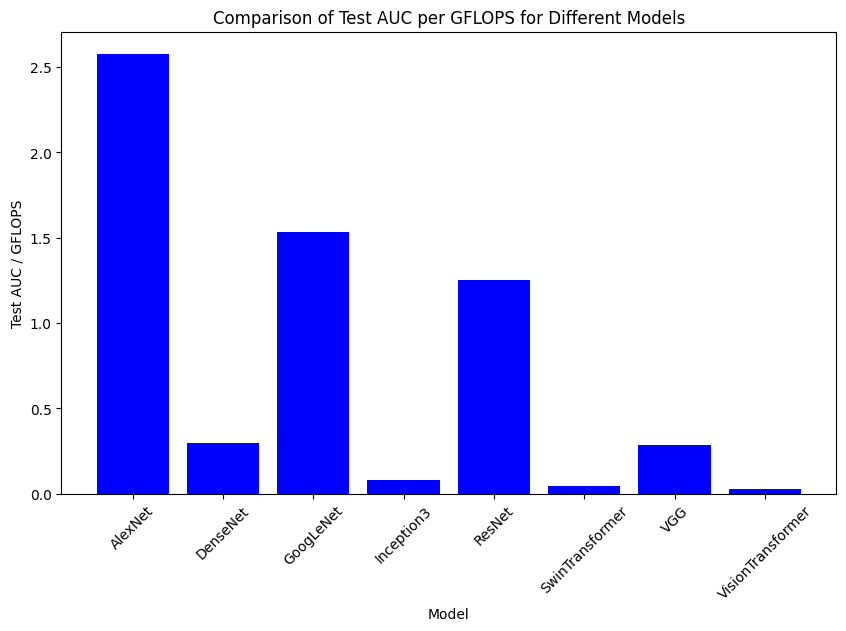

In [3]:

# Calculate test_auc / gflops
combined_data['test_auc_per_gflops'] = combined_data['test_auc'] / combined_data['gflops']

# Group by model and take the mean if each model appears multiple times
grouped_data = combined_data.groupby('model').mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['model'], grouped_data['test_auc_per_gflops'], color='blue')
plt.xlabel('Model')
plt.ylabel('Test AUC / GFLOPS')
plt.title('Comparison of Test AUC per GFLOPS for Different Models')
plt.xticks(rotation=45)
plt.show()

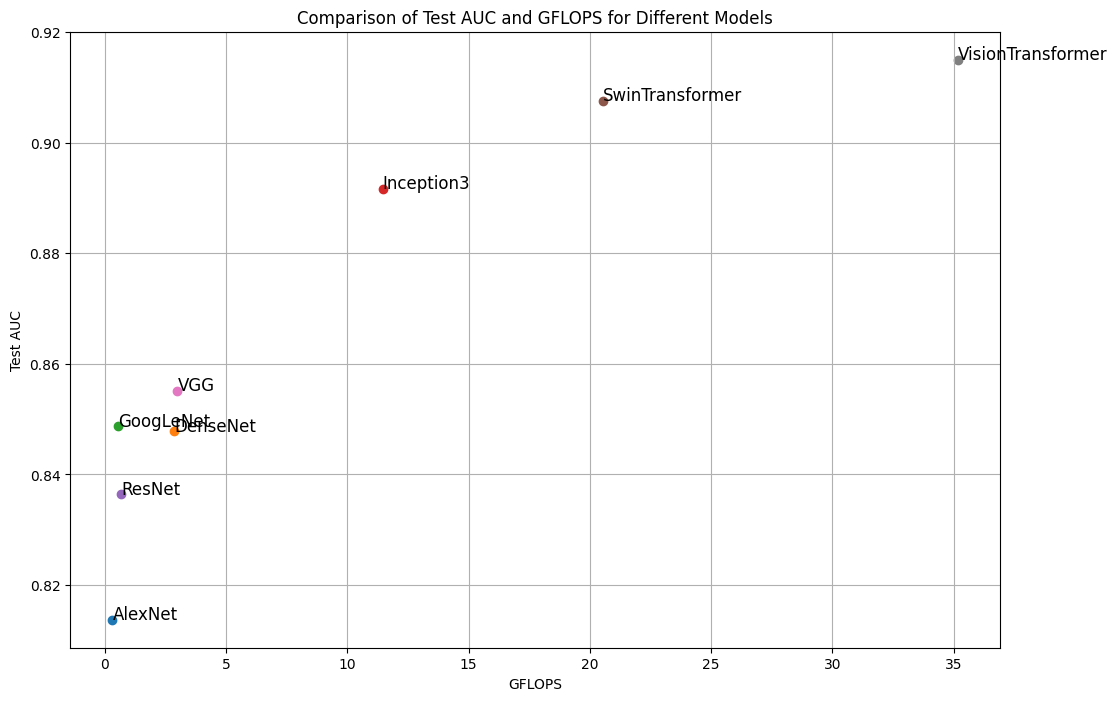

In [4]:
# Group by model and take the mean if each model appears multiple times
grouped_data = combined_data.groupby('model').mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(12, 8))
for i, model in enumerate(grouped_data['model']):
    plt.scatter(grouped_data['gflops'][i], grouped_data['test_auc'][i])
    plt.text(grouped_data['gflops'][i], grouped_data['test_auc'][i], model, fontsize=12)

plt.xlabel('GFLOPS')
plt.ylabel('Test AUC')
plt.title('Comparison of Test AUC and GFLOPS for Different Models')
plt.grid(True)
plt.show()

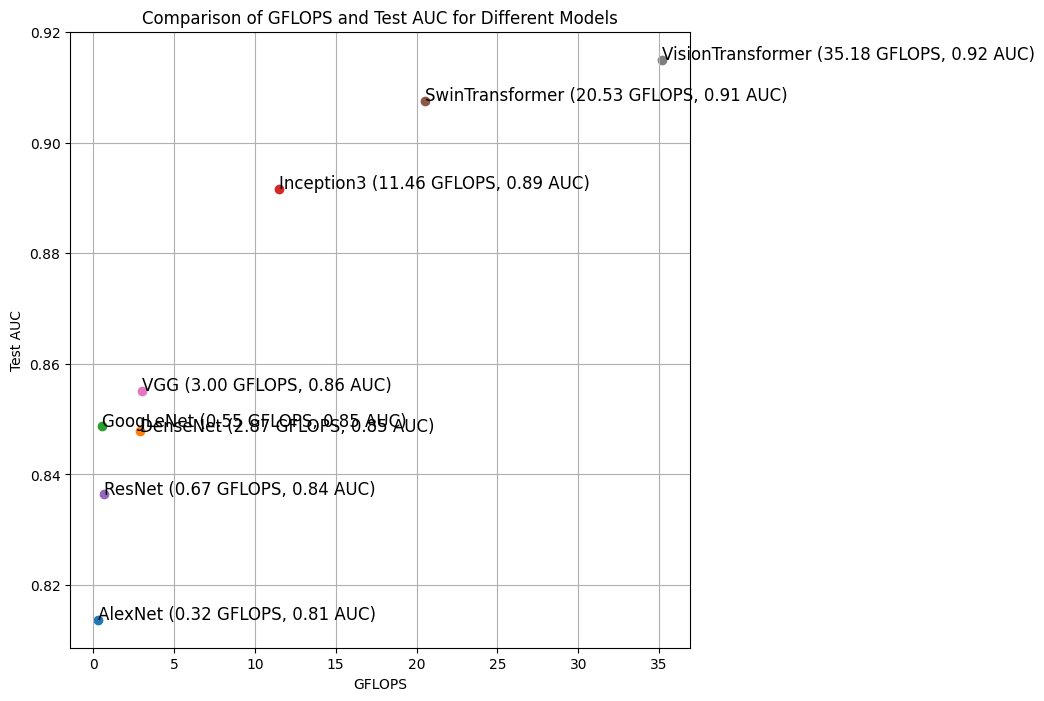

In [5]:
# Group by model and take the mean if each model appears multiple times
grouped_data = combined_data.groupby('model').mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(8, 8))
for i, model in enumerate(grouped_data['model']):
    plt.scatter(grouped_data['gflops'][i], grouped_data['test_auc'][i])
    plt.text(grouped_data['gflops'][i], grouped_data['test_auc'][i], f"{model} ({grouped_data['gflops'][i]:.2f} GFLOPS, {grouped_data['test_auc'][i]:.2f} AUC)", fontsize=12)

plt.xlabel('GFLOPS')
plt.ylabel('Test AUC')
plt.title('Comparison of GFLOPS and Test AUC for Different Models')
plt.grid(True)
plt.show()

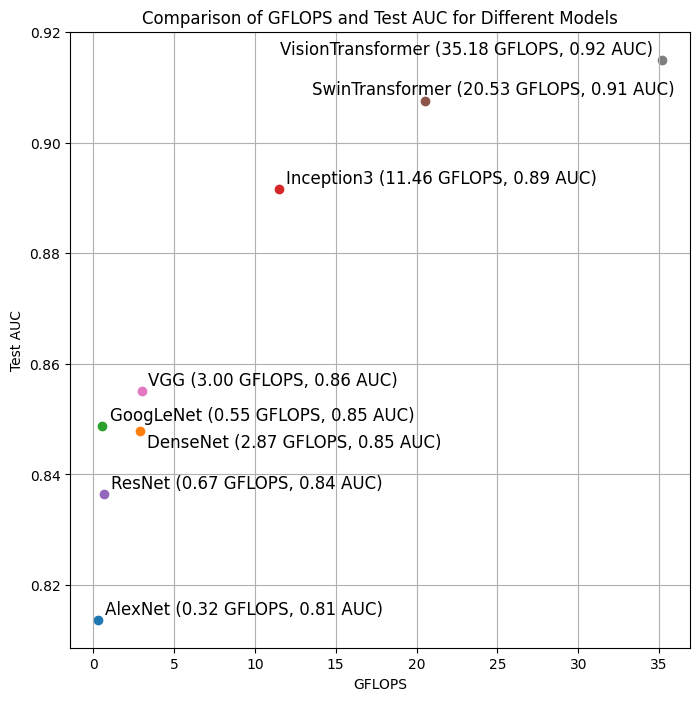

In [6]:
from adjustText import adjust_text

# Your existing code for groupby and plotting
grouped_data = combined_data.groupby('model').mean().reset_index()

plt.figure(figsize=(8, 8))

texts = []  # Empty list to collect text objects

for i, model in enumerate(grouped_data['model']):
    plt.scatter(grouped_data['gflops'][i], grouped_data['test_auc'][i])
    text = plt.text(grouped_data['gflops'][i], grouped_data['test_auc'][i], 
                    f"{model} ({grouped_data['gflops'][i]:.2f} GFLOPS, {grouped_data['test_auc'][i]:.2f} AUC)", 
                    fontsize=12)
    texts.append(text)  # Append the text object to the list

plt.xlabel('GFLOPS')
plt.ylabel('Test AUC')
plt.title('Comparison of GFLOPS and Test AUC for Different Models')
plt.grid(True)

# Automatically adjust the text labels
adjust_text(texts)

plt.show()

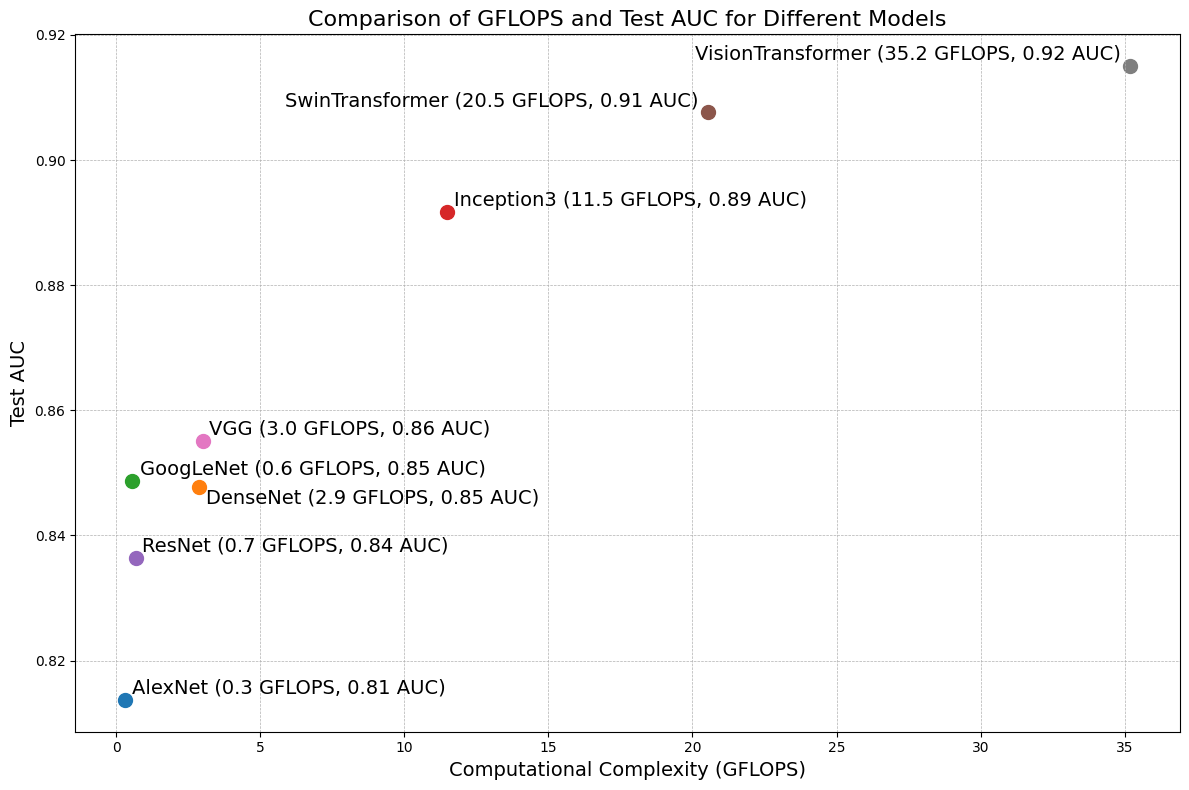

In [7]:
from adjustText import adjust_text
import matplotlib.pyplot as plt

# Your existing data preparation step
grouped_data = combined_data.groupby('model').mean().reset_index()

plt.figure(figsize=(12, 8))  # Slightly larger figure

texts = []

for i, model in enumerate(grouped_data['model']):
    plt.scatter(grouped_data['gflops'][i], grouped_data['test_auc'][i], s=100)  # Larger marker size
    text = plt.text(grouped_data['gflops'][i], grouped_data['test_auc'][i], 
                    f"{model} ({grouped_data['gflops'][i]:.1f} GFLOPS, {grouped_data['test_auc'][i]:.2f} AUC)", 
                    fontsize=14)  # Slightly larger font
    texts.append(text)

plt.xlabel('Computational Complexity (GFLOPS)', fontsize=14)
plt.ylabel('Test AUC', fontsize=14)
plt.title('Comparison of GFLOPS and Test AUC for Different Models', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Enhanced gridlines

adjust_text(texts)
plt.tight_layout()  # Ensures that text and labels are within the figure boundary
plt.show()


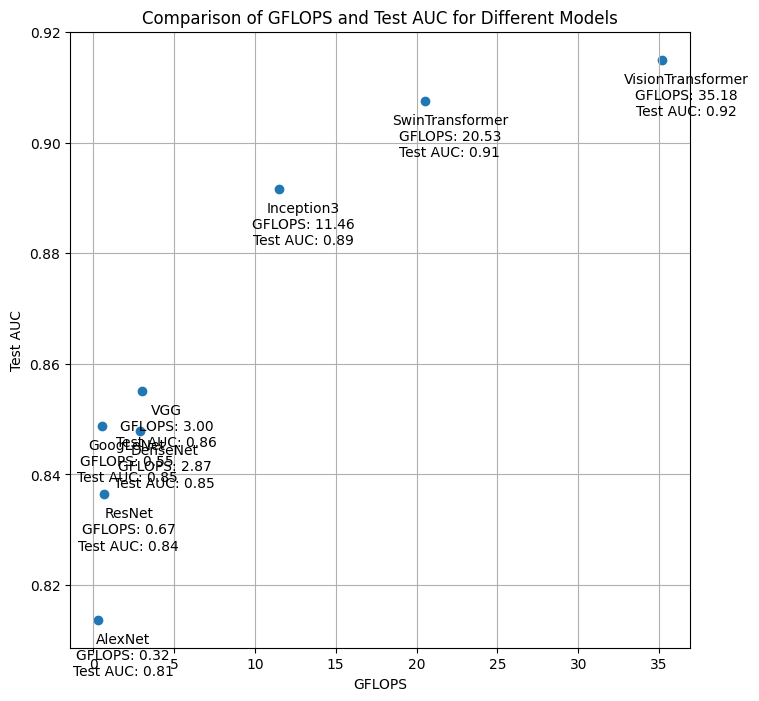

In [8]:
# Group by model and take the mean if each model appears multiple times
grouped_data = combined_data.groupby('model').mean().reset_index()

# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the points to get the axis limits
scatter = ax.scatter(grouped_data['gflops'], grouped_data['test_auc'])

# Get axis limits
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

# Offset values for text position
x_offset = (x_lim[1] - x_lim[0]) * 0.02
y_offset = (y_lim[1] - y_lim[0]) * 0.01

# Annotate each point with a text label
for i, (x, y) in enumerate(zip(grouped_data['gflops'], grouped_data['test_auc'])):
    label_text = f"{grouped_data['model'][i]}\nGFLOPS: {x:.2f}\nTest AUC: {y:.2f}"
    
    # Adjust label positions to appear below the point
    x_text = x + x_offset * 2
    y_text = y - y_offset * 2
    
    ax.text(x_text, y_text, label_text, fontsize=10, ha='center', va='top')

# Labels and title
ax.set_xlabel('GFLOPS')
ax.set_ylabel('Test AUC')
ax.set_title('Comparison of GFLOPS and Test AUC for Different Models')

# Grid
ax.grid(True)

# Show plot
plt.show()

### Debug code

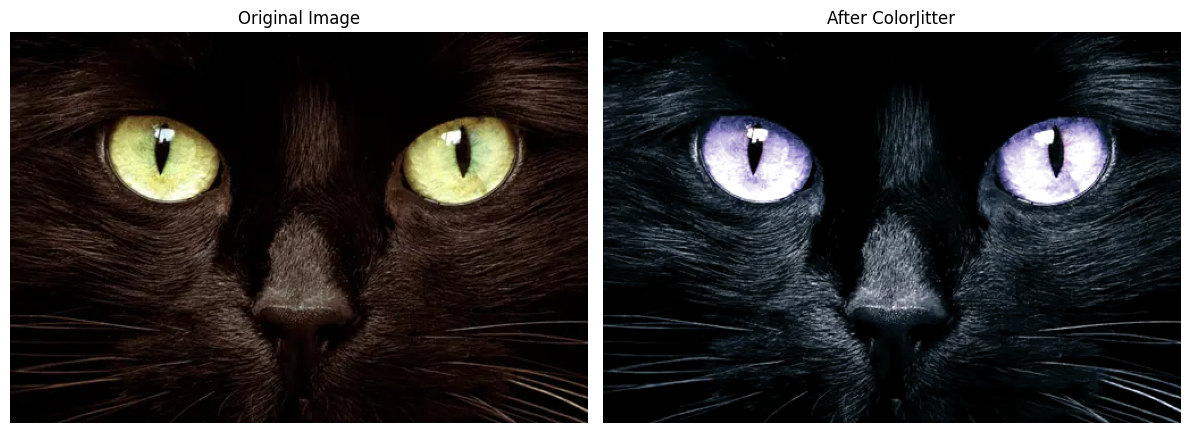

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import requests
# Load a sample image (replace with your own image path if needed)
# image_path = "https://image.shutterstock.com/image-photo/image-260nw-725888862.jpg"
image = Image.open("cat.png")

# Create a ColorJitter transform
transform = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)

# Apply the transform to the image
jittered_image = transform(image)

# Plot original and transformed image side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

# ColorJitter applied image
ax[1].imshow(jittered_image)
ax[1].set_title("After ColorJitter")
ax[1].axis("off")

plt.tight_layout()
plt.show()
